In [1]:
# 3.2.2

from scipy.stats import gamma

# Define Priors
a = 2
b = 1

# Data in Group 1
n1 = 111
sy1 = 217

# Data in Group 2
n2 = 44
sy2 = 66

In [2]:
# Posterior mean
(a + sy1) / (b + n1)

1.9553571428571428

In [3]:
# Posterior Mode
(a + sy1 - 1) / (b + n1)

1.9464285714285714

In [4]:
# Posterior 95% Confidence Interval

p = [0.025, 0.975]
rate = b + n1
shape = a + sy1

(1 / rate) * gamma.ppf(q=p,a=shape)

array([1.70494315, 2.22267902])

In [5]:
(a + sy2) / (b + n2)

1.511111111111111

In [6]:
(a + sy2 - 1) / (b + n2)

1.488888888888889

In [7]:
rate = b + n2
shape = a + sy2

(1 / rate) * gamma.ppf(q=p, a=shape)

array([1.17343691, 1.89083626])

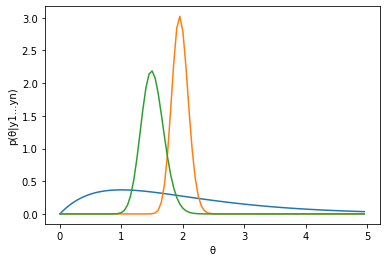

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = [i/20 for i in range(0, 100)]
common_prior = gamma.pdf(x=x, a=a, scale=1)
theta1 = gamma.pdf(x=x, a=(a + sy1), scale = 1/(b + n1) )
theta2 = gamma.pdf(x=x, a=(a + sy2), scale = 1/(b + n2) )
plt.plot(common_prior);
plt.plot(theta1);
plt.plot(theta2);
plt.xticks([0, 20, 40, 60, 80, 100], labels=['0', '1', '2', '3', '4', '5']);
plt.xlabel('\u03B8');
plt.ylabel('p(\u03B8|y1...yn)');

In [9]:
from scipy.stats import nbinom

y = np.arange(11)

size = a + sy1
mu = (a + sy1) / (b + n1)
prob = size/(size+mu)

pp1 = nbinom.pmf(k=y, n=size, p=prob)
pp1

array([1.42747280e-01, 2.76651808e-01, 2.69307070e-01, 1.75565966e-01,
       8.62293019e-02, 3.40338661e-02, 1.12442271e-02, 3.19842112e-03,
       7.99605280e-04, 1.78476301e-04, 3.60111475e-05])

In [10]:
size = a + sy2
mu = (a + sy2) / (b + n2)
prob = size/(size+mu)

pp2 = nbinom.pmf(k=y, n=size, p=prob)
pp2

array([2.24346027e-01, 3.31641953e-01, 2.48731464e-01, 1.26168134e-01,
       4.86844431e-02, 1.52403474e-02, 4.03096145e-03, 9.26370022e-04,
       1.88798238e-04, 3.46586138e-05, 5.80155057e-06])

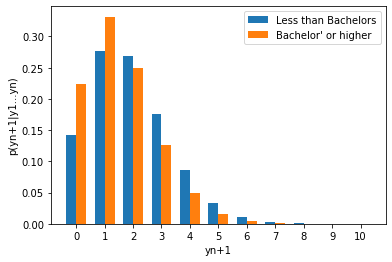

In [11]:
width = 0.35
plt.bar(y, pp1, width, label='Less than Bachelors')
plt.bar(y+width, pp2, width, label="Bachelor' or higher")
plt.xticks(y + width / 2, y)
plt.legend(loc='best')
plt.xlabel('yn+1');
plt.ylabel('p(yn+1|y1...yn)');
plt.show()